In [1]:
# Standard scientific Python imports
%matplotlib inline
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets

In [2]:
# The digits dataset for training
digits = datasets.load_digits()

# The data is made of 8x8 images of digits
# zip the image and label (dependent variable) together
images_and_labels = list(zip(digits.images, digits.target))

In [3]:
print(f'Number of images in the training set, N= {len(images_and_labels)}')

Number of images in the training set, N= 1797


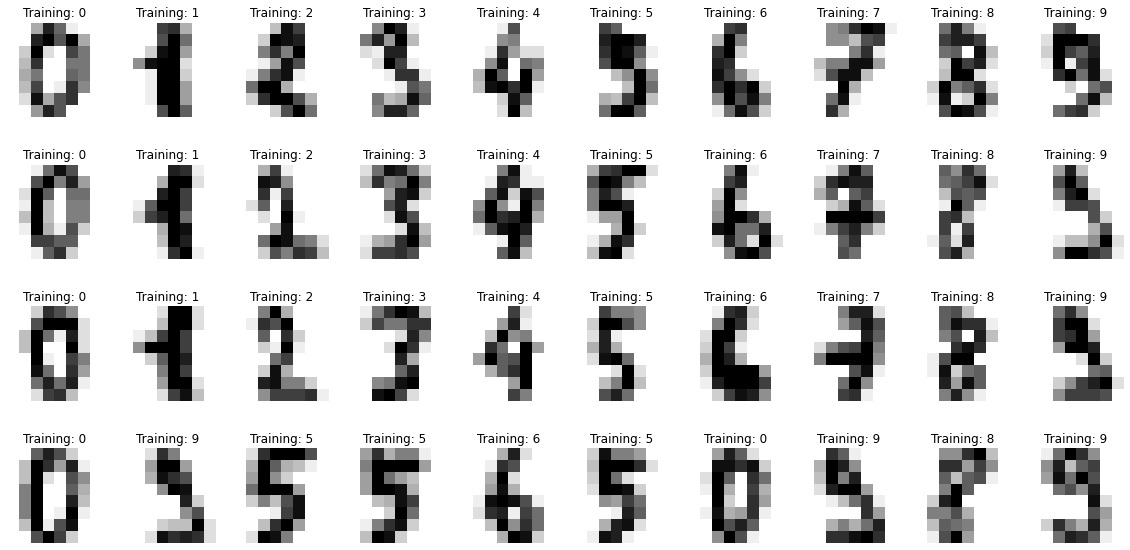

In [4]:
# Draw the first 40 data points - in this case a single data point is an image
plt.figure(1, figsize=(20, 10))
for index, (image, label) in enumerate(images_and_labels[:40]):
    plt.subplot(4, 10, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Training: {label}')

In [6]:
# To apply a classifier on this data, we need to flatten the image
# Turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print(f'N={len(data)}, M={len(data[0])}')

N=1797, M=64


In [7]:
from sklearn import svm, metrics

# Create a classifier: a support vector classifier
# gamma is normally determined using a hyperparameter search which would need a validation dataset
classifier = svm.SVC(gamma=0.001)

# Learn the digits on the first half of the digits - 50% data is used as the training set
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Predict the value of the digit on the second half
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [8]:
%%time

acc = metrics.accuracy_score(expected, predicted)

print(f'Classification report for classifier {classifier}:\nAccuracy={acc:.3f}\n')

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
Accuracy=0.969

Wall time: 2 ms


In [9]:
print(f'Confusion matrix:\n{metrics.confusion_matrix(expected, predicted)}')

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


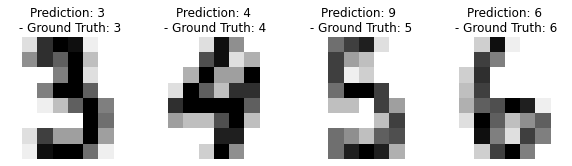

In [10]:
# Change the indices in images_and_predictions below to see more predictions
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))

plt.figure(1, figsize=(10, 10))
for index, (image, prediction) in enumerate(images_and_predictions[30:34]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Prediction: {prediction}\n - Ground Truth: {expected[index+30]}')

plt.show()

In [16]:
classifier1 = svm.SVC(gamma=0.001)
classifier2 = svm.SVC(gamma=0.0011)
classifier3 = svm.SVC(gamma=0.0012)

training, training_labels = data[:n_samples // 2], digits.target[:n_samples // 2]
testing, testing_labels = data[n_samples // 2:], digits.target[n_samples // 2:]

classifier1.fit(training, training_labels)
classifier2.fit(training, training_labels)
classifier3.fit(training, training_labels)

predicted1 = classifier1.predict(testing)
predicted2 = classifier2.predict(testing)
predicted3 = classifier3.predict(testing)

acc = metrics.accuracy_score(expected, predicted1)
print(f'Model 1 Accuracy={acc:.3f}')

acc = metrics.accuracy_score(expected, predicted2)
print(f'Model 2 Accuracy={acc:.3f}')

acc = metrics.accuracy_score(expected, predicted3)
print(f'Model 3 Accuracy={acc:.3f}')

Model 1 Accuracy=0.969
Model 2 Accuracy=0.968
Model 3 Accuracy=0.968


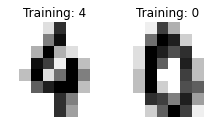

In [17]:
plt.figure(1, figsize=(20, 10))
for index, (image, label) in enumerate(images_and_labels[100:102]):
    plt.subplot(4, 10, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Training: {label}')

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Frac of 5 is a standard 80 train 20 test split
frac = 5
low = n_samples // frac
high = n_samples - low

#x_train, y_train = data[:n_samples // 2], digits.target[:n_samples // 2]
#x_test, y_test = data[n_samples // 2:], digits.target[n_samples // 2:]

x_train, y_train = data[ : high ], digits.target[ : high ]
x_test, y_test = data[ low : ], digits.target[ low : ]

clf = MLPClassifier( learning_rate_init=0.001, random_state=1 , max_iter=300 ).fit(x_train, y_train)
clf.score(x_test, y_test)

0.9756606397774688